In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [23]:
(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 28 * 28))
x_test = x_test.reshape((len(x_test), 28 * 28))

In [24]:
encoding_dim = 16

# Encoder
input_img = layers.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

# Decoder
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = models.Model(input_img, decoded)


In [25]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.5280 - val_loss: 0.3630
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.3510 - val_loss: 0.3365
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.3309 - val_loss: 0.3242
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.3209 - val_loss: 0.3170
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.3138 - val_loss: 0.3124
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.3095 - val_loss: 0.3079
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.3047 - val_loss: 0.3058
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.3036 - val_loss: 0.3045
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.3016 - val_loss: 0.3035
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.3013 - val_loss: 0.3030
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.3009 - val_loss: 0.3025
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


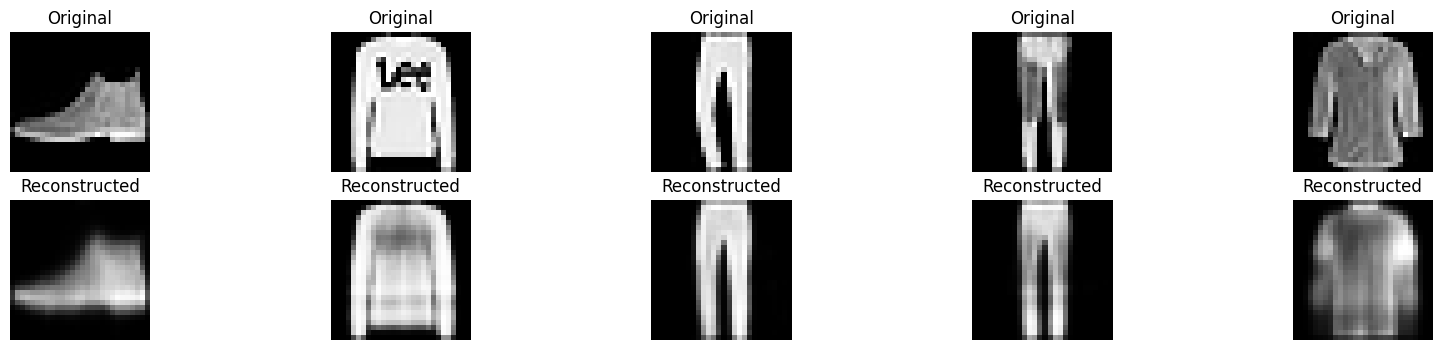

In [27]:
reconstructed = autoencoder.predict(x_test)

# Visualize Original vs Reconstructed
n = 5
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()